In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from simpletransformers.language_representation import RepresentationModel

# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].values.tolist()
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial GPT2

In [5]:
model=RepresentationModel(
    model_type="gpt2",
    model_name="gpt2",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Some weights of the model checkpoint at gpt2 were not used when initializing GPT2ForTextRepresentation: ['h.2.attn.c_proj.weight', 'h.2.attn.c_attn.weight', 'h.11.mlp.c_proj.weight', 'h.0.attn.c_attn.weight', 'h.10.attn.c_attn.bias', 'h.5.mlp.c_fc.weight', 'h.2.mlp.c_fc.weight', 'h.8.ln_2.bias', 'h.9.mlp.c_proj.weight', 'h.8.attn.c_proj.bias', 'ln_f.weight', 'h.0.mlp.c_proj.bias', 'h.9.attn.bias', 'h.5.attn.c_attn.bias', 'h.7.ln_1.bias', 'h.5.ln_1.bias', 'h.8.attn.c_proj.weight', 'h.9.ln_2.bias', 'h.3.ln_1.bias', 'h.9.mlp.c_proj.bias', 'h.5.ln_2.weight', 'h.1.attn.c_attn.bias', 'wpe.weight', 'h.9.attn.c_attn.bias', 'h.1.ln_1.weight', 'h.6.attn.c_proj.weight', 'h.3.mlp.c_fc.bias', 'h.11.ln_2.weight', 'h.4.mlp.c_fc.weight', 'h.11.ln_2.bias', 'h.10.attn.c_proj.bias', 'h.10.mlp.c_fc.bias', 'h.11.attn.c_attn.weight', 'h.10.ln_1.bias', 'h.4.mlp.c_fc.bias', 'h.5.attn.c_proj.weight', 'h.5.ln_2.bias', 'h.7.attn.c_proj.weight', 'h.9.attn.c_proj.bias', 'h.6.mlp.c_fc.weight', 'h.1.attn.c_attn.weig

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

(33341, 768)

In [6]:
gpt2Dataframe = pd.DataFrame(vectorialRepresentation)
gpt2Dataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.049382,-1.689170,0.125161,1.532496,-0.278101,-1.472362,0.647662,-0.001147,0.283807,-0.642158,...,-0.633792,-1.651012,-0.125270,0.463464,-2.336910,0.599829,0.456571,-1.454380,-0.248412,-1.217028
1,-0.196051,-1.050959,0.379414,0.600750,-1.396111,-0.674255,-0.696847,-0.951937,0.399987,-0.511408,...,-0.022768,-1.435138,0.266274,1.533045,-0.878772,-0.498342,0.721073,-0.348775,-1.158851,0.719073
2,-0.124116,-1.843021,0.103216,1.462178,-0.005101,-1.506421,0.748103,-0.331265,0.108248,-0.714669,...,-0.205724,-1.273557,0.148319,1.040405,-1.822082,1.175730,0.144863,-1.121056,-0.393310,-0.830379
3,0.093786,-1.830754,0.091666,1.606940,-0.344332,-1.586407,0.564648,0.013798,0.303688,-0.866112,...,-0.276822,-1.477311,0.225908,0.979640,-2.088282,0.787676,0.325613,-1.195062,-0.260428,-1.336636
4,-0.520397,-1.185420,0.188441,0.124530,-0.088210,-0.670810,0.158441,-0.521730,-0.151663,0.935828,...,0.655867,-0.167788,0.161360,2.219622,-0.862535,0.859737,-0.859212,0.396633,0.038291,-0.592164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,-0.374529,-2.272542,0.044269,0.461531,0.176475,-1.185792,0.225021,-0.602029,0.587838,-1.371382,...,0.212238,-0.836626,0.213119,1.321033,-1.274496,0.617099,0.090269,-0.678895,-0.325219,-1.147089
33337,0.105731,-0.958190,-0.170999,0.596401,-0.174964,-0.533257,0.352654,-0.877857,-0.015315,0.069762,...,-0.646483,-1.369128,-0.375674,0.992168,-1.702754,0.622799,-0.495783,-0.743536,-0.196982,-0.148497
33338,-0.609945,-2.277925,0.048276,0.776602,-0.965749,-0.272305,0.124149,0.669301,0.997055,-1.258666,...,-0.481704,-0.548704,0.351879,2.480618,-1.553076,1.036135,0.321628,-0.238001,0.503824,-0.592205
33339,-0.283495,-2.136468,0.098455,1.412214,-0.312815,-0.712444,0.259777,-0.178888,0.299716,-0.722423,...,-0.467623,-1.578884,0.165928,1.496043,-1.430650,0.757832,-0.040354,-0.509912,-0.185867,-0.388227


# Visualização de dados com TSNE

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               0          1  Target
0      58.027473  57.163063       0
1      -4.400294   9.581222       0
2      19.427670  12.228110       0
3      47.632359  47.219559       0
4      -5.803322  43.842812       0
...          ...        ...     ...
33336  26.492409  17.303556       1
33337  -5.928406  28.187504       1
33338  21.508890 -25.933893       1
33339   8.046358  -9.028975       0
33340   3.852408  24.914295       1

[33341 rows x 3 columns]


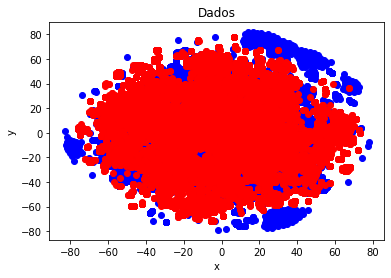

In [7]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(gpt2Dataframe)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
print(df_tsne)
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [8]:
def getModel():
    return LinearSVC()

In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(gpt2Dataframe.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8696956065377118

In [10]:
scores = cross_val_score(getModel(),gpt2Dataframe.values,target,cv=10)

scores.mean()

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increas

0.859872289410184

In [11]:
predicoes = cross_val_predict(getModel(), gpt2Dataframe.values, target, cv=10)

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increas

In [12]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.87      0.86      0.87     16493
        Spam       0.86      0.88      0.87     16848

    accuracy                           0.87     33341
   macro avg       0.87      0.87      0.87     33341
weighted avg       0.87      0.87      0.87     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

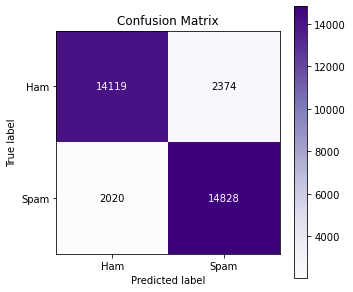

In [13]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

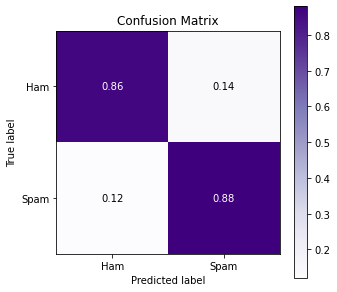

In [14]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()